# Explore here

### Paso 2: Visualiza la información de entrada

Como primer paso visualizo las primeras 9 fotos de perros y las primeras 9 fotos de gatos.

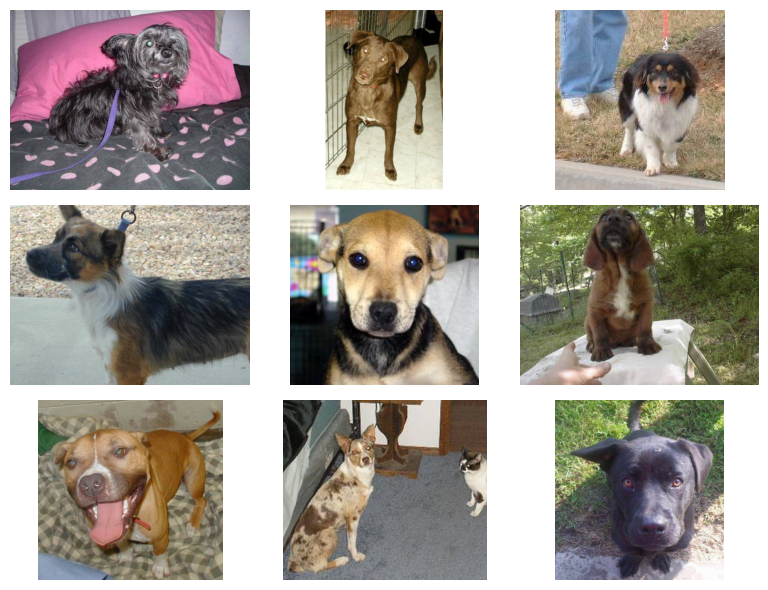

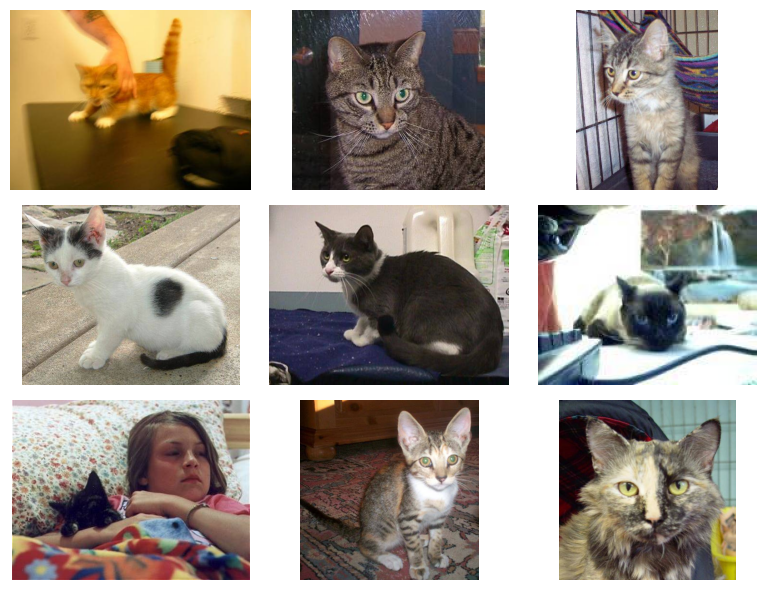

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Ruta del archivo de la imagen
base_image_path = '/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/data/raw/train/'
dog_path = [
    "dog.0.jpg",
    "dog.1.jpg",
    "dog.2.jpg",
    "dog.3.jpg",
    "dog.4.jpg",
    "dog.5.jpg",
    "dog.6.jpg",
    "dog.7.jpg",
    "dog.8.jpg",
]

cat_path = [
    "cat.0.jpg",
    "cat.1.jpg",
    "cat.2.jpg",
    "cat.3.jpg", 
    "cat.4.jpg",
    "cat.5.jpg",
    "cat.6.jpg",
    "cat.7.jpg",
    "cat.10.jpg",
]

# Concatenamos el base path al resto de la ruta de acceso para tener el código completo dentro de la variable que usaremos después.
dogs_images = []
for path in dog_path:
    dogs_images.append(f"{base_image_path}/dogs/{path}") # He agregado aqui manualmente la carpeta dogs en la ruta. 

cats_images = []
for path in cat_path:
    cats_images.append(f"{base_image_path}/cats/{path}") # He agregado aqui manualmente la carpeta cats en la ruta. 

# Creo un gráfico con múltiples subgráficos
plt.figure(figsize=(8, 6))

# Cargar y mostrar todas las imágenes
for i, dog_img_path in enumerate(dogs_images):
    img = Image.open(dog_img_path)
    plt.subplot(3, 3, i + 1)  # Dividir en una cuadrícula de 3 filas y 3 columnas
    plt.imshow(img)
    plt.axis('off')  # Desactivar los ejes

plt.tight_layout()
plt.show()

# Creo un gráfico con múltiples subgráficos repitiendo el proceso anterior. 
plt.figure(figsize=(8, 6))

for i, cat_img_path in enumerate(cats_images):
    img = Image.open(cat_img_path)
    plt.subplot(3, 3, + i + 1)  # Dividir en una cuadrícula de 3 filas y 3 columnas
    plt.imshow(img)
    plt.axis('off')  # Desactivar los ejes

plt.tight_layout()
plt.show()

#### Organizar las imágenes de train en subdirectorios

Para cargar las imagenes y luego poder etiquetarlas, necesito que esten separadas por clase, en este caso perro y gato, cada una dentro de su repectiva carpeta dentro del directorio. ( una carpeta para las fotos de perros y otra para las fotos de gatos en train, y lo mismo en test).

Primero organizo las imagenes de train ya que el archivo viene con nombre de la clase y solo tenog que dividirlas por carpetas. 

In [37]:
import os
import shutil

# Ruta de las carpetas
train_folder = '/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/data/raw/train'
dogs_folder = '/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/data/raw/train/dogs'
cats_folder = '/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/data/raw/train/cats'

# Mover las imágenes a las subcarpetas 'cats' y 'dogs' según el nombre del archivo
for filename in os.listdir(train_folder):
    file_path = os.path.join(train_folder, filename)

    # Asegúrate de que solo mueves los archivos y no las carpetas
    if os.path.isfile(file_path):  # Solo mover archivos, no carpetas
        # Mover las imágenes que contienen 'cat' en el nombre a la carpeta 'cats'
        if 'cat' in filename.lower():
            shutil.move(file_path, os.path.join(cats_folder, filename))
        # Mover las imágenes que contienen 'dog' en el nombre a la carpeta 'dogs'
        elif 'dog' in filename.lower():
            shutil.move(file_path, os.path.join(dogs_folder, filename))

print("Las imágenes de 'train' han sido organizadas en subcarpetas 'cats' y 'dogs'.")


Las imágenes de 'train' han sido organizadas en subcarpetas 'cats' y 'dogs'.


#### Cargar las imágenes de train y test. Y redimensionar las imágenes a 200x200 píxeles usando ImageDataGenerator

Aquí paso a cargar las imagenes de train y test y aprovecho para redimencionarlas.

Como se observa al final del bloque, al no tener etiquetas de clase, las imagenes de test no se encuentran, asi que paso a clasificarlas en el siguiente bloque.

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Crear el generador para redimensionar las imágenes de entrenamiento
train_datagen = ImageDataGenerator(rescale=1./255) # Normalizar las imágenes a [0, 1]

# Crear el generador para los datos de prueba (sin etiquetar aún)
test_datagen = ImageDataGenerator(rescale=1./255) # Normalizar las imágenes a [0, 1]
    
# Ruta de la carpeta de datos de entrenamiento y prueba
train_dir = '/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/data/raw/train'  
test_dir = '/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/data/raw/test1'  

# Usar flow_from_directory() para cargar las imágenes de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),  # Redimensionar a 200x200 píxeles
    batch_size=32,
    class_mode='categorical'  # Ya que es clasificación binaria (gato o perro)
)

# Usar flow_from_directory() para cargar las imágenes de prueba
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),  # Redimensionar a 200x200 píxeles
    batch_size=32,
    class_mode=None,  # Las imágenes de test no tienen etiquetas (solo predicción)
    shuffle=False  # No mezclar las imágenes de prueba
)


Found 25000 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.


In [39]:
# Verificar que el generador de entrenamiento devuelve datos
x_train_batch, y_train_batch = next(train_generator)
print(f"Dimensiones de x_train_batch: {x_train_batch.shape}")
print(f"Dimensiones de y_train_batch: {y_train_batch.shape}")

# Verificar que el generador de prueba devuelve datos (solo imágenes, sin etiquetas)
x_test_batch = next(test_generator)
print(f"Dimensiones de x_test_batch: {x_test_batch.shape}")


Dimensiones de x_train_batch: (32, 200, 200, 3)
Dimensiones de y_train_batch: (32, 2)
Dimensiones de x_test_batch: (32, 200, 200, 3)


En este punto ya tengo mis variables listas para entrenar la red.

In [40]:
train_generator

test_generator

### Paso 3: Construye una RNA

### Modelo RNA de clasificación de conjuntos de imágenes (Sequential model)

In [41]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import set_random_seed

set_random_seed(77) 

model = Sequential()
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Flatten())
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 4096,activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

In [33]:
# print(model.summary)     ARREGLAR!!!!!

#### Compilado del modelo

In [42]:
# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#### Entrenamiento del modelo

In [44]:
history = model.fit(train_generator, epochs = 1)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5957s 8s/step - accuracy: 0.4963 - loss: 0.6932


#### Accuracy del modelo

Accuracy de train:

In [47]:
# Evaluar el modelo en los datos de entrenamiento
loss, accuracy = model.evaluate(train_generator)

# Imprimir la precisión
print(f"Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1950s 2s/step - accuracy: 0.4986 - loss: 0.6932
Accuracy: 0.5


Predict de test:

In [49]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_generator, verbose=1)

# Si es clasificación binaria, puedes convertir las probabilidades en etiquetas (0 o 1):
predicted_classes = (predictions[:, 1] > 0.5).astype("int32")  # Usa el umbral de 0.5 para clasificación binaria

# Si es clasificación multiclase (más de 2 clases), usa np.argmax para obtener la clase con mayor probabilidad:
# predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las predicciones
print(predicted_classes)

391/391 ━━━━━━━━━━━━━━━━━━━━ 969s 2s/step
[1 1 1 ... 1 1 1]


### Paso 4: Optimiza el modelo anterior

#### Creo un objeto checkpoint y un objeto early_stopping (Estos son los callbacks)

In [52]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Guardar el modelo con el mejor rendimiento en la validación
checkpoint = ModelCheckpoint('/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/models/Model_CNN_200x200_64_64_128_128_256_256_256_512_512_512_4096_4096_Softmax_2Class_77.h5', 
                             monitor = 'val_loss', 
                             save_best_only = True, 
                             mode = 'min', 
                             verbose = 1)

# Detener el entrenamiento si no hay mejora en la validación durante 5 épocas consecutivas
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = 5, 
                               verbose = 1, 
                               mode = 'min')


#### Entreno el modelo con los callbacks

In [53]:
history = model.fit(train_generator, 
                    epochs=1,   
                    steps_per_epoch = len(train_generator),  # Necesario si estás usando generadores
                    callbacks=[checkpoint, early_stopping])

782/782 ━━━━━━━━━━━━━━━━━━━━ 6400s 8s/step - accuracy: 0.4966 - loss: 0.6932


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


#### Accuracy del modelo optimizado

In [54]:
# Evaluar el modelo en los datos de entrenamiento
loss, accuracy = model.evaluate(train_generator)

# Imprimir la precisión
print(f"Accuracy: {accuracy}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 1845s 2s/step - accuracy: 0.5063 - loss: 0.6931
Accuracy: 0.5


#### Predict del modelo optimizado

In [55]:
# Realizar predicciones en el conjunto de prueba
predictions = model.predict(test_generator, verbose=1)

# Si es clasificación binaria, puedes convertir las probabilidades en etiquetas (0 o 1):
predicted_classes = (predictions[:, 1] > 0.5).astype("int32")  # Usa el umbral de 0.5 para clasificación binaria

# Si es clasificación multiclase (más de 2 clases), usa np.argmax para obtener la clase con mayor probabilidad:
# predicted_classes = np.argmax(predictions, axis=1)

# Mostrar las predicciones
print(predicted_classes)

391/391 ━━━━━━━━━━━━━━━━━━━━ 957s 2s/step
[0 0 0 ... 0 0 0]


### Predicción de imagenes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
cat


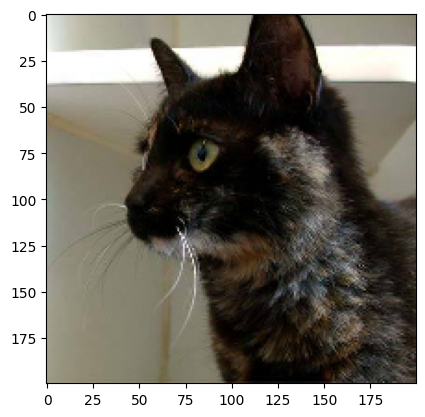

In [57]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

img = image.load_img("/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/data/raw/test1/test/5.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
output = model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")

###  Guardar el modelo

In [58]:
import pickle

with open("/Users/julian/Desktop/vs code/DEEP_LEARNING_Project_21_Julian_Lopez/DEEP_LEARNING_-Identificador_de_imagenes-_Project_21_Julian_Lopez/models/Model_CNN_200x200_64_64_128_128_256_256_256_512_512_512_4096_4096_Softmax_2Class_77.pkl", "wb") as f:
    pickle.dump(model, f)
